<a href="https://colab.research.google.com/github/RevathiChandrika/MINOR_PROJECT/blob/main/MINOR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import sympy

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"sympy version: {sympy.__version__}")


torch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124
sympy version: 1.13.1


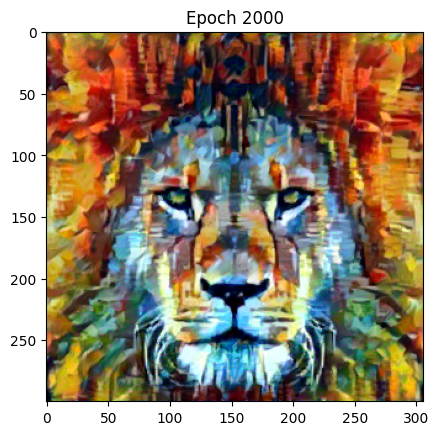

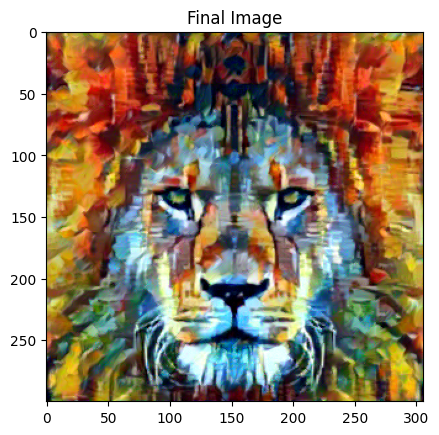

In [ ]:
# Import required libraries
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Check if CUDA (GPU) is available
device = ("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained VGG16 model (you can switch to VGG19 similarly)
model = models.vgg16(pretrained=True).features
for param in model.parameters():
    param.requires_grad = False
model.to(device)

# Function to get activations from different layers of VGG16
def model_activations(input, model):
    layers = {
        '0' : 'conv1_1',
        '5' : 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',
        '28': 'conv5_1'
    }
    features = {}
    x = input.unsqueeze(0)
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

# Image transformation to match VGG16's input format
transform = transforms.Compose([
    transforms.Resize(300),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the content and style images
content = Image.open("download.jpg").convert("RGB")  # Replace with your content image path
content = transform(content).to(device)

style = Image.open("c1.png").convert("RGB")  # Replace with your style image path
style = transform(style).to(device)

# Convert tensor image to numpy array
def imcnvt(image):
    x = image.cpu().clone().detach().numpy().squeeze()
    x = x.transpose(1, 2, 0)
    x = x * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    return np.clip(x, 0, 1)

# Function to compute Gram Matrix (used for style loss)
def gram_matrix(imgfeature):
    _, d, h, w = imgfeature.size()
    imgfeature = imgfeature.view(d, h * w)
    gram_mat = torch.mm(imgfeature, imgfeature.t())
    return gram_mat

# Initialize the target image (the one we'll modify to look like the style)
target = content.clone().requires_grad_(True).to(device)

# Extract features from the content and style images
style_features = model_activations(style, model)
content_features = model_activations(content, model)

# Define weights for different layers
style_wt_meas = {
    "conv1_1" : 1.0,
    "conv2_1" : 0.8,
    "conv3_1" : 0.4,
    "conv4_1" : 0.2,
    "conv5_1" : 0.1
}

# Compute the Gram matrix for the style features
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Set hyperparameters
content_wt = 100
style_wt = 1e8
epochs = 2000
optimizer = torch.optim.Adam([target], lr=0.007)

# Start the style transfer process
for i in range(1, epochs + 1):
    target_features = model_activations(target, model)

    # Compute content loss (L2 distance between content and target)
    content_loss = torch.mean((content_features['conv4_2'] - target_features['conv4_2']) ** 2)

    # Compute style loss (L2 distance between style Gram matrix and target Gram matrix)
    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _, d, w, h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer] * torch.mean((target_gram - style_gram) ** 2)) / (d * w * h)

    # Total loss is a weighted sum of content and style loss
    total_loss = content_wt * content_loss + style_wt * style_loss

    # Backpropagate and update the target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Print progress every 100 iterations


    # Save and display the result every 500 iterations
    if i % 2000 == 0:
        plt.imshow(imcnvt(target))
        plt.title(f"Epoch {i}")
        plt.show()
        plt.imsave(f"epoch_{i}.png", imcnvt(target))

# Final output image
plt.imshow(imcnvt(target))
plt.title("Final Image")
plt.show()


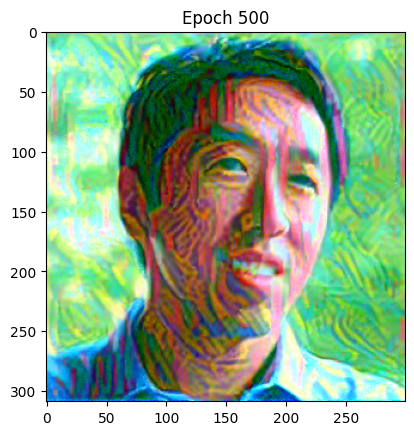

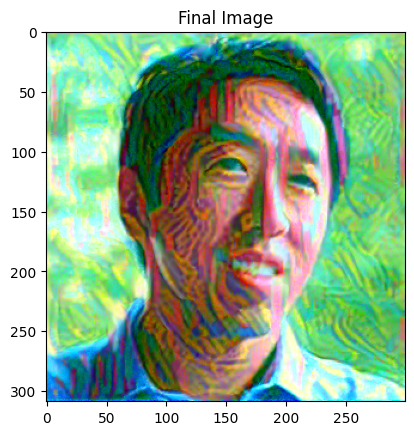

In [ ]:
# Import required libraries
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Check if CUDA (GPU) is available
device = ("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained VGG16 model (you can switch to VGG19 similarly)
model = models.vgg16(pretrained=True).features
for param in model.parameters():
    param.requires_grad = False
model.to(device)

# Function to get activations from different layers of VGG16
def model_activations(input, model):
    layers = {
        '0' : 'conv1_1',
        '5' : 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',
        '28': 'conv5_1'
    }
    features = {}
    x = input.unsqueeze(0)
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

# Image transformation to match VGG16's input format
transform = transforms.Compose([
    transforms.Resize(300),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the content and style images
content = Image.open("p1.png").convert("RGB")  # Replace with your content image path
content = transform(content).to(device)

style = Image.open("colour.png").convert("RGB")  # Replace with your style image path
style = transform(style).to(device)

# Convert tensor image to numpy array
def imcnvt(image):
    x = image.cpu().clone().detach().numpy().squeeze()
    x = x.transpose(1, 2, 0)
    x = x * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    return np.clip(x, 0, 1)

# Function to compute Gram Matrix (used for style loss)
def gram_matrix(imgfeature):
    _, d, h, w = imgfeature.size()
    imgfeature = imgfeature.view(d, h * w)
    gram_mat = torch.mm(imgfeature, imgfeature.t())
    return gram_mat

# Initialize the target image (the one we'll modify to look like the style)
target = content.clone().requires_grad_(True).to(device)

# Extract features from the content and style images
style_features = model_activations(style, model)
content_features = model_activations(content, model)

# Define weights for different layers
style_wt_meas = {
    "conv1_1" : 1.0,
    "conv2_1" : 0.8,
    "conv3_1" : 0.4,
    "conv4_1" : 0.2,
    "conv5_1" : 0.1
}

# Compute the Gram matrix for the style features
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Set hyperparameters
content_wt = 100
style_wt = 1e8
epochs = 500
optimizer = torch.optim.Adam([target], lr=0.007)

# Start the style transfer process
for i in range(1, epochs + 1):
    target_features = model_activations(target, model)

    # Compute content loss (L2 distance between content and target)
    content_loss = torch.mean((content_features['conv4_2'] - target_features['conv4_2']) ** 2)

    # Compute style loss (L2 distance between style Gram matrix and target Gram matrix)
    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _, d, w, h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer] * torch.mean((target_gram - style_gram) ** 2)) / (d * w * h)

    # Total loss is a weighted sum of content and style loss
    total_loss = content_wt * content_loss + style_wt * style_loss

    # Backpropagate and update the target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Print progress every 100 iterations


    # Save and display the result every 500 iterations
    if i % 500 == 0:
        plt.imshow(imcnvt(target))
        plt.title(f"Epoch {i}")
        plt.show()
        plt.imsave(f"epoch_{i}.png", imcnvt(target))

# Final output image
plt.imshow(imcnvt(target))
plt.title("Final Image")
plt.show()


Please upload your content image.


Saving download.jpg to download (1).jpg
Content image uploaded: download (1).jpg
Please upload your style image.


Saving colour.png to colour (1).png
Style image uploaded: colour (1).png
Epoch 500, Total Loss: 121079344.0


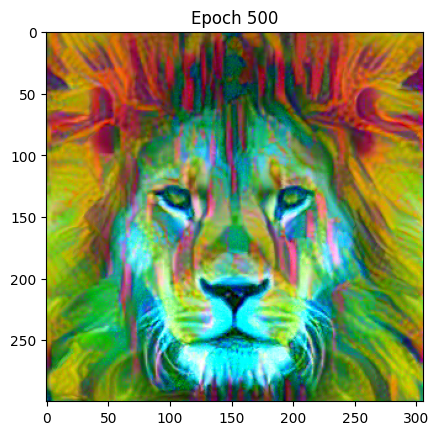

Epoch 1000, Total Loss: 70395176.0


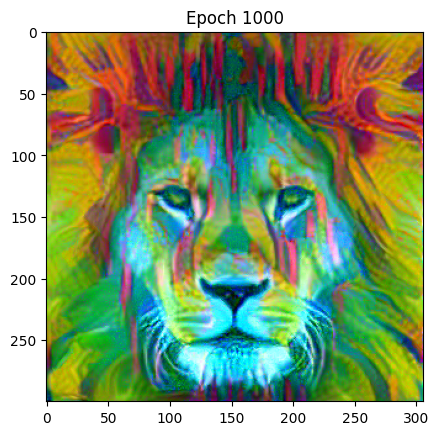

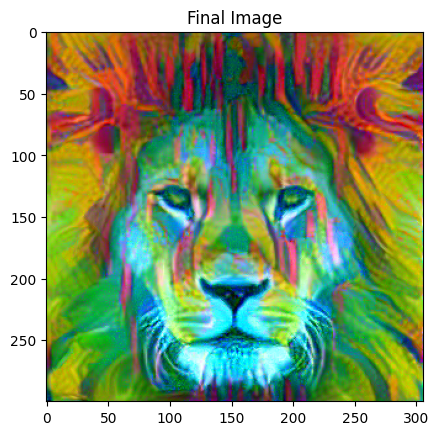

In [ ]:
# Import required libraries
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Check if CUDA (GPU) is available
device = ("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained VGG16 model (you can switch to VGG19 similarly)
model = models.vgg16(pretrained=True).features
for param in model.parameters():
    param.requires_grad = False
model.to(device)

# Function to get activations from different layers of VGG16
def model_activations(input, model):
    layers = {
        '0' : 'conv1_1',
        '5' : 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',
        '28': 'conv5_1'
    }
    features = {}
    x = input.unsqueeze(0)
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

# Image transformation to match VGG16's input format
transform = transforms.Compose([
    transforms.Resize(300),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Function to handle the upload of images
def upload_image(image_type="content"):
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(filename).convert("RGB")
        if image_type == "content":
            print(f"Content image uploaded: {filename}")
        else:
            print(f"Style image uploaded: {filename}")
        return transform(image).to(device), filename

# Upload content and style images
print("Please upload your content image.")
content, content_filename = upload_image("content")
print("Please upload your style image.")
style, style_filename = upload_image("style")

# Convert tensor image to numpy array for visualization
def imcnvt(image):
    x = image.cpu().clone().detach().numpy().squeeze()
    x = x.transpose(1, 2, 0)
    x = x * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    return np.clip(x, 0, 1)

# Function to compute Gram Matrix (used for style loss)
def gram_matrix(imgfeature):
    _, d, h, w = imgfeature.size()
    imgfeature = imgfeature.view(d, h * w)
    gram_mat = torch.mm(imgfeature, imgfeature.t())
    return gram_mat

# Initialize the target image (the one we'll modify to look like the style)
target = content.clone().requires_grad_(True).to(device)

# Extract features from the content and style images
style_features = model_activations(style, model)
content_features = model_activations(content, model)

# Define weights for different layers
style_wt_meas = {
    "conv1_1" : 1.0,
    "conv2_1" : 0.8,
    "conv3_1" : 0.4,
    "conv4_1" : 0.2,
    "conv5_1" : 0.1
}

# Compute the Gram matrix for the style features
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Set hyperparameters
content_wt = 100
style_wt = 1e8
epochs = 1000
optimizer = torch.optim.Adam([target], lr=0.007)

# Start the style transfer process
for i in range(1, epochs + 1):
    target_features = model_activations(target, model)

    # Compute content loss (L2 distance between content and target)
    content_loss = torch.mean((content_features['conv4_2'] - target_features['conv4_2']) ** 2)

    # Compute style loss (L2 distance between style Gram matrix and target Gram matrix)
    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _, d, w, h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer] * torch.mean((target_gram - style_gram) ** 2)) / (d * w * h)

    # Total loss is a weighted sum of content and style loss
    total_loss = content_wt * content_loss + style_wt * style_loss

    # Backpropagate and update the target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Print progress every 100 iterations

    # Save and display the result every 500 iterations
    if i % 500 == 0:
        print(f"Epoch {i}, Total Loss: {total_loss.item()}")
        plt.imshow(imcnvt(target))
        plt.title(f"Epoch {i}")
        plt.show()
        plt.imsave(f"epoch_{i}.png", imcnvt(target))

# Final output image
plt.imshow(imcnvt(target))
plt.title("Final Image")
plt.show()

# Save the final image
plt.imsave("final_image.png", imcnvt(target))


Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Please upload your content image.


Saving content1.jpg to content1 (4).jpg
Content image uploaded: content1 (4).jpg
Please upload your style image.


Saving wave3.jpg to wave3 (1).jpg
Style image uploaded: wave3 (1).jpg
Enter the number of epochs for style transfer: 240
Epoch 240/240, Total Loss: 275317728.0, Content Loss: 1.3360092639923096


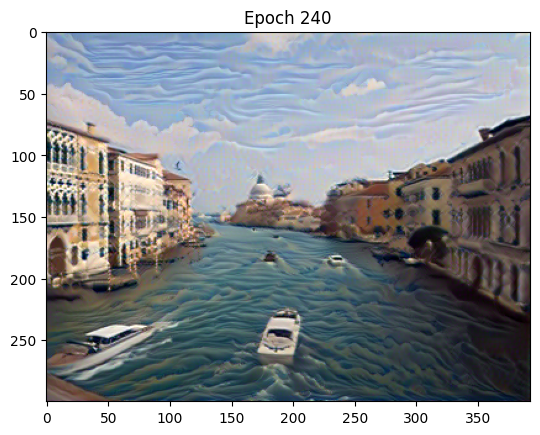

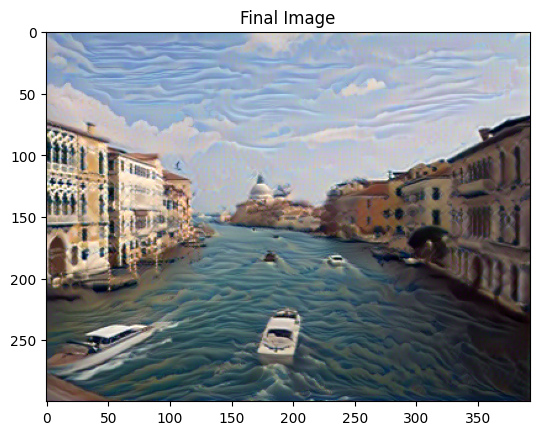

Style transfer complete. Final output saved as 'final_image.png'.


In [ ]:
# Import required libraries
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Check if CUDA (GPU) is available
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load pre-trained VGG16 model (you can switch to VGG19 similarly)
model = models.vgg16(pretrained=True).features
for param in model.parameters():
    param.requires_grad = False
model.to(device)

# Function to get activations from different layers of VGG16
def model_activations(input, model):
    layers = {
        '0' : 'conv1_1',
        '5' : 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',
        '28': 'conv5_1'
    }
    features = {}
    x = input.unsqueeze(0)
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

# Image transformation to match VGG16's input format
transform = transforms.Compose([
    transforms.Resize(300),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Function to handle the upload of images
def upload_image(image_type="content"):
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(filename).convert("RGB")
        if image_type == "content":
            print(f"Content image uploaded: {filename}")
        else:
            print(f"Style image uploaded: {filename}")
        return transform(image).to(device), filename

# Upload content and style images
print("Please upload your content image.")
content, content_filename = upload_image("content")
print("Please upload your style image.")
style, style_filename = upload_image("style")

# Convert tensor image to numpy array for visualization
def imcnvt(image):
    x = image.cpu().clone().detach().numpy().squeeze()
    x = x.transpose(1, 2, 0)
    x = x * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    return np.clip(x, 0, 1)

# Function to compute Gram Matrix (used for style loss)
def gram_matrix(imgfeature):
    _, d, h, w = imgfeature.size()
    imgfeature = imgfeature.view(d, h * w)
    gram_mat = torch.mm(imgfeature, imgfeature.t())
    return gram_mat

# Initialize the target image (the one we'll modify to look like the style)
target = content.clone().requires_grad_(True).to(device)

# Extract features from the content and style images
style_features = model_activations(style, model)
content_features = model_activations(content, model)

# Define weights for different layers
style_wt_meas = {
    "conv1_1" : 1.0,
    "conv2_1" : 0.8,
    "conv3_1" : 0.4,
    "conv4_1" : 0.2,
    "conv5_1" : 0.1
}

# Compute the Gram matrix for the style features
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Set hyperparameters
content_wt = 100  # Increase content weight if you want to preserve content more
style_wt = 1e8    # Lower the style weight to allow more focus on content

# Prompt user for the number of epochs
epochs = int(input("Enter the number of epochs for style transfer: "))
optimizer = torch.optim.Adam([target], lr=0.003)  # A lower learning rate for finer updates

# Start the style transfer process
for i in range(1, epochs + 1):
    target_features = model_activations(target, model)

    # Compute content loss (L2 distance between content and target)
    content_loss = torch.mean((content_features['conv4_2'] - target_features['conv4_2']) ** 2)

    # Compute style loss (L2 distance between style Gram matrix and target Gram matrix)
    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _, d, w, h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer] * torch.mean((target_gram - style_gram) ** 2)) / (d * w * h)

    # Total loss is a weighted sum of content and style loss
    total_loss = content_wt * content_loss + style_wt * style_loss

    # Backpropagate and update the target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Display intermediate results and show loss value for monitoring progress
    if i%epochs == 0:
        print(f"Epoch {i}/{epochs}, Total Loss: {total_loss.item()}, Content Loss: {content_loss.item()}")
        plt.imshow(imcnvt(target))
        plt.title(f"Epoch {i}")
        plt.show()
        plt.imsave(f"epoch_{i}.png", imcnvt(target))

# Final output image
plt.imshow(imcnvt(target))
plt.title("Final Image")
plt.show()

# Save the final image
final_output_path = "final_image.png"
plt.imsave(final_output_path, imcnvt(target))
print(f"Style transfer complete. Final output saved as '{final_output_path}'.")
